<a href="https://colab.research.google.com/github/katerinakazantseva/SnakeMakeAdv/blob/master/HW4_ITMO_Basics_of_MaxQuant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Hi everybody!

Today we will analyze real experimental data using MaxQuant. We will do the subsequent analysis of the data using python and find proteins interacting with the SMC1 protein in yeast (part of the cohesin complex).

[Link](https://forms.gle/drhV4KUfXcZov23JA) to the google.form for answering questions.

The program code is located here.


Maximum grade: 15 scores

---

### **1. Interactomics is the study of protein-protein interactions**

The russian proverb says "tell me who your friends are, and I'll tell you who you are" has a lot to do with protein-protein interactions. Indeed, knowing with whom the protein interacts, we can say a lot about its function.

Suppose that your scientific advisor has set you a task to study the question with whom exactly the interesting protein X interacts. There are several methods for solving this problem.

*   [Two-hybrid screening](https://en.wikipedia.org/wiki/Two-hybrid_screening) allows you to study the interaction between two predetermined proteins
*   [Affinity purification](https://en.wikipedia.org/wiki/Tandem_affinity_purification) coupled with proteome mass-spectrometry.

The obvious advantage of the second method is that, in one experiment, we analyze all proteins interacting with X. In other words, on the scale of the entire study of the entire interactome of a cell - the first method works according to quadratic, $O(N^2)$, asymptotics, and the second - according to linear, $O(N)$, where $N$ is the number of proteins in the entire proteome.
However, affinity purification might fail to detect weak/transient interactions while two-hybrid assay is more sensitive.



As an example, let us take the data of the experiment on studying the SMC1 interactome ([YFL008W](https://www.yeastgenome.org/locus/S000001886)) in	S. cerevisiae.

SMC1 protein is part of the cohesin protein complex, which binds sister chromatids during mitosis and homologous chromosomes during meiosis.

[<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780080450469014911-gr2.jpg" height="400"/>]()

[6xHis-tag](https://en.wikipedia.org/wiki/Polyhistidine-tag) was added to the SMC1 protein. Next, the yeast lysate was chromatographed on a nickel-containing column under maximum native conditions so as not to destroy weak protein-protein interactions. In parallel, as a control, chromatography of a lysate of cells expressing an empty vector with a 6xHis-tag (untag SMC1 protein) was carried out.

The experiment and control were repeated three times. The purified proteins were treated with protease and measured by tandem mass spectrometry combined with liquid chromatography (HPLC+MS/MS). As a result, the following files were obtained

| File | Experiment | Replicate | 
| --- | --- | --- |
| Orbi3_SA_IP_SMC1_01.RAW | SMC1 | 1 |
| Orbi3_SA_IP_SMC1_02.RAW | SMC1 | 2 |
| Orbi3_SA_IP_SMC1_03.RAW | SMC1 | 3 |
| Orbi3_SA_IP_pHis3_01.RAW | ctrl | 1 |
| Orbi3_SA_IP_pHis3_02.RAW | ctrl | 2 |
| Orbi3_SA_IP_pHis3_03.RAW | ctrl | 3 |

All the listed files can be found [here](https://drive.google.com/open?id=1XR5dHIhaLwURxxCvTO0Z7BZn7ELK8ob7). There you can find both the fasta file and the MaxQuant version, although I strongly recommend that you always download the latest version of MaxQuant from the [official site](https://maxquant.org/), and the fasta file from the [Ensemble site](https://www.ensembl.org/info/data/ftp/index.html).

### **2. Analyzing Proteomic Data with MaxQuant**

As we discussed in the lesson, the data generated by a mass spectrometer is quite complex compared to typical raw data from a DNA sequencer - instead of simple peptide sequences, we get their spectra, which still need to be interpreted.

In our laboratory, we are developing the [MaxQuant](https://www.nature.com/articles/nbt.1511) software, which allows us to analyze and obtain, as output, a statistically significant interpretation of such experimental data.

MaxQuant is very easy to use. This is one of the main reasons for the popularity of the program. In order to process the 6 files described above, we need to complete 3 steps and wait a little.

All steps are performed in Windows OS - I have not tested any other OS, so I cannot guarantee anything.

**IMPORTANT** Before using MaxQuant you need to install [.NET Core SDK 2.1](https://dotnet.microsoft.com/download/dotnet-core/2.1) on your computer, because it is needed to run C# projects.

## ***Step 1. Loading RAW-files in MaxQuant and description of the experimental design***

The first step is to load the RAW files into MaxQuant GUI. This can be done in one of two ways


1.   Drag-and-drop selected files into the "Raw data" window
2.   Press the "Load folder" button on the panel in the "Raw data" window and select the folder containing the RAW files

After that, the GUI should look like this, adjusted for the path to the folder with RAW files

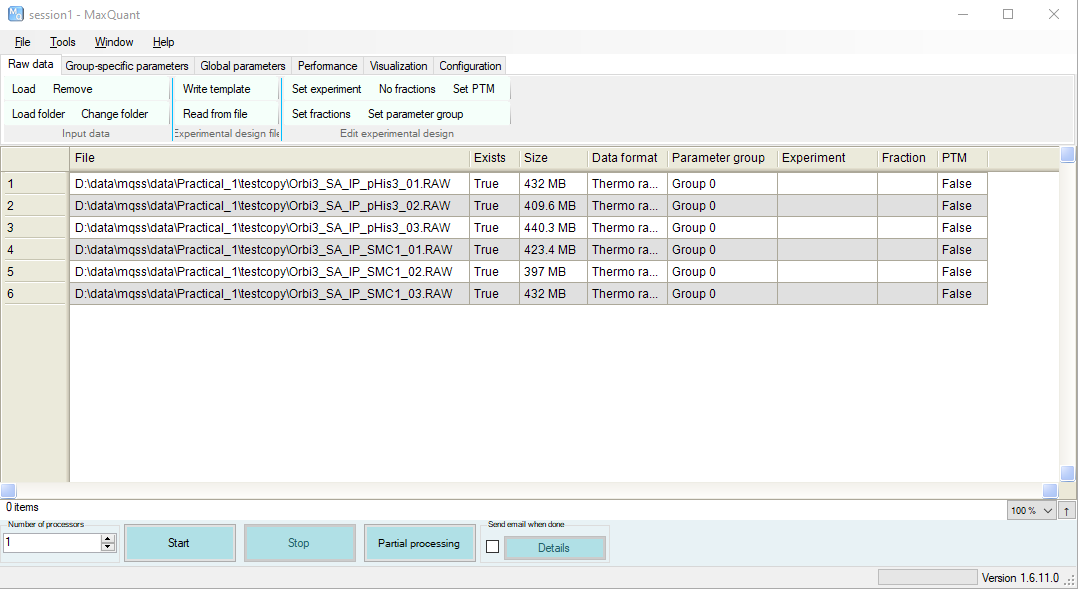




This table has the following columns


*   ***File*** full path to the file
*   ***Exists*** [True/False] does the file exist at the specified address or not
*   ***Data format*** in addition to the RAW format, there are many types of files in proteomics. Each vendor makes its own and MaxQuant canparse most of them.
*   ***Experiment*** this means the name of the experiment for this file
*   and other parameters that are not so important in our case

If we leave the ***Experiment*** column blank, then MaxQuant will decide that all files are the same experiment and that only the total protein intensity among all 6 files needs to be reported in the output files. We want to get 6 different values for each protein. To do this, fill in this column by highlighting the line and clicking on the button in the header ***Set experiment***

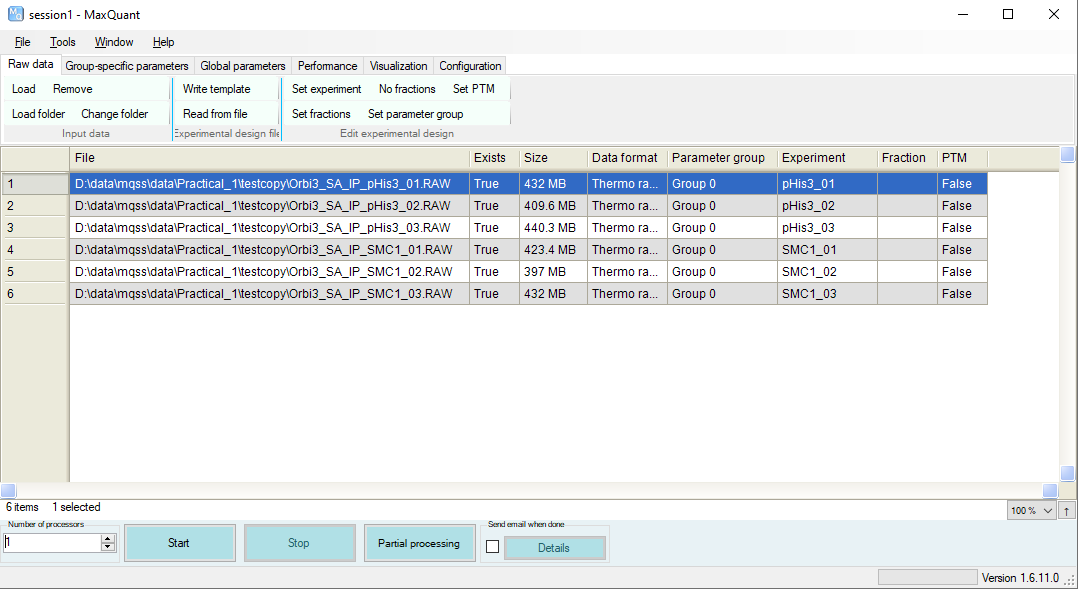

***Step 2. Proteomic reference fasta file***

During the lecture, I said that for MaxQuant to work, you need to provide a fasta file with all the annotated proteins - during the analysis, MaxQuant will read these proteins, select all kinds of peptides and form a database of all kinds of theoretical spectra. It is in this database that MaxQuant will look for the best match with the experimental spectrum.

The easiest way to find a fasta file with a yeast reference proteome is to download it from the [Ensemble](https://www.ensembl.org/info/data/ftp/index.html) fasta [file](ftp://ftp.ensembl.org/pub/release-99/fasta/saccharomyces_cerevisiae/pep/Saccharomyces_cerevisiae.R64-1-1.pep.all.fa.gz) of the corresponding organism (or from Uniprot).

This file must then be loaded into MaxQuant. Namely - you need to go to the "***Global parameters***" / "***Sequences***" window and press the "***Add***" button in the "***Fasta files*** ".

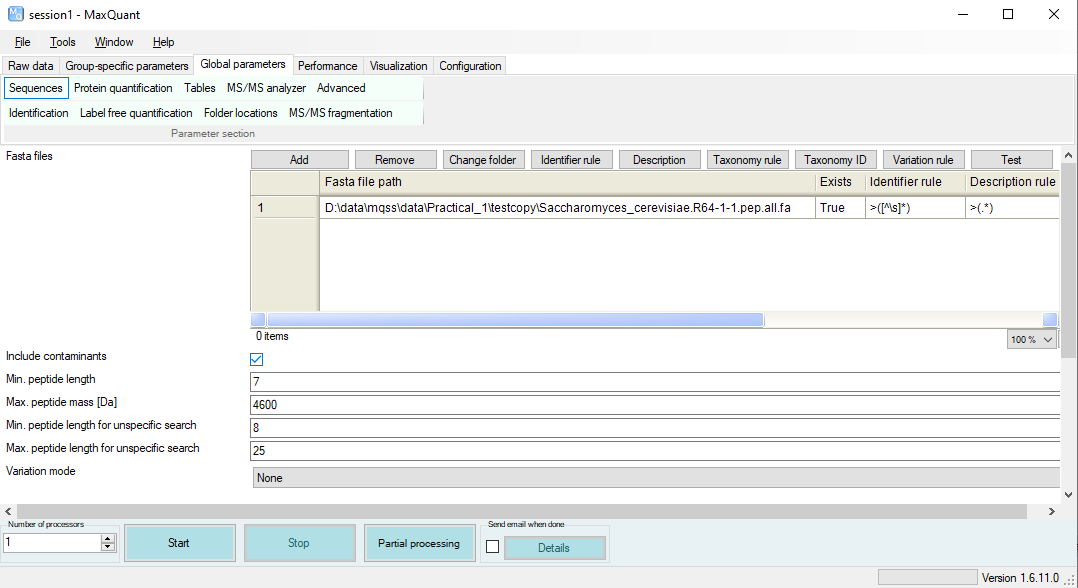

***Step 3. Enable Label-Free Quantification***

This experiment was performed without any multiplexing (for example, SILAC and TMT methods discussed in the lecture). Therefore, we can enable the data normalization option - [LFQ](https://www.ncbi.nlm.nih.gov/pubmed/24942700). This method allows you to neutralize the effects of statistical bias.

To do this, go to the window "***Group-specific parameters***" / "***Label-free quantification***" and change the default value "***None***" to "***LFQ***"

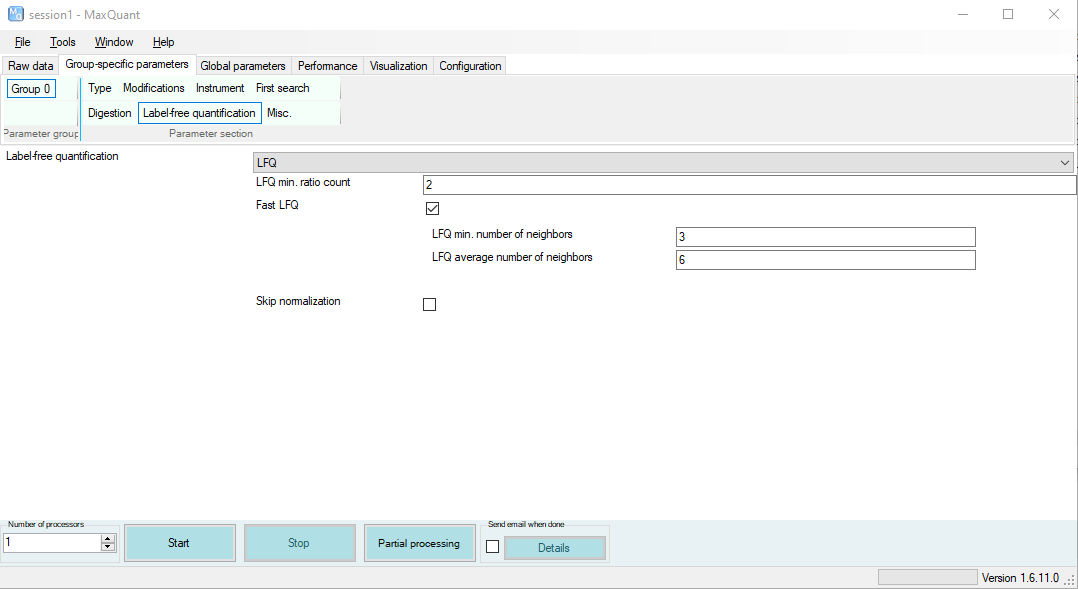

Well, and the final touch before starting - if your computer supports multithreading, then you can specify a larger number of processors that MaxQuant can use per unit of time.

***Number of processors*** can be specified as an interval between 1 and min (number of files, number of available threads on your computer). I indicated 6.

However, if you have 4GB RAM then I would recommend to use just one thread, 8GB - 2 threads, etc.

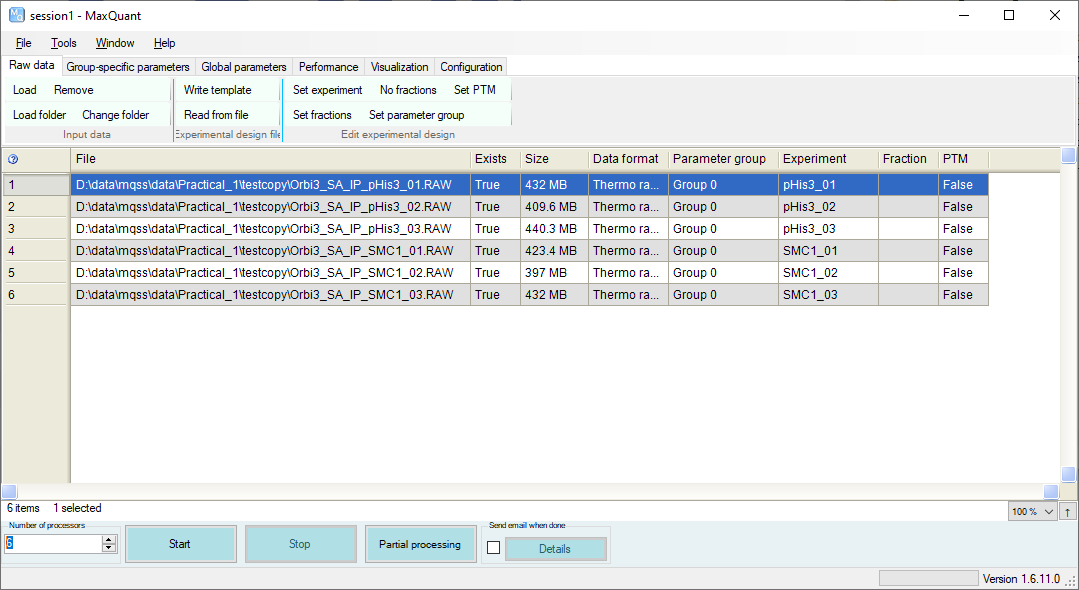

**Question 1** - in the [google.form](https://forms.gle/bn7zQWGDucD1BmF18)

Now you need to press the coveted ***Start*** button and wait a little. In my case, the entire calculation took about 50 minutes.

**Question 2** - in the [google.form](https://forms.gle/bn7zQWGDucD1BmF18)

The file ***\<your_folder_with_RAW_files\>/combined/proc/#runningTimes.txt*** could be pretty useful

If nothing works for you (OS does not allow you to do anything or you are just tired), then you can write to me in a telegram and I will send you a link to the MaxQuant results for these six files.

### **3. Analysis of results**

After MaxQuant has finished working, all the information we need will be located in the following folder ***\<your_folder_with_RAW_files\>\/combined\/txt***. There you will find many files in *.txt* format, among which we only need a few


*   peptides.txt contains information about identified peptides (one line - one peptide) 
*   proteinGroups.txt contains information about the identified proteins (one line - one protein)

**Question 3** - in the [google.form](https://forms.gle/bn7zQWGDucD1BmF18)

**Question 4** - in the [google.form](https://forms.gle/bn7zQWGDucD1BmF18)

Column *\"Intensity\"* contains information about the total intensity of the given protein. How do I find a function? Google or [SGD](https://www.yeastgenome.org/) it!

If you are interested in the purpose of each column, then I advise you to read the file ***tables.pdf*** in the folder ***\<your_folder_with_RAW_files>/combined/txt***.



---



We have quickly got familiar with the results of MaxQuant's work, and now we will find a list of proteins that specifically bind to the SMC1 protein under study. That is, we will perform a simple differential expression analysis.

Download the ***proteinGroups.txt*** file that I posted on the github 'gist. (You can download your local version)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats #t-test
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("https://gist.githubusercontent.com/pgsin/eb0dc03f506e253e629dc38dd152156c/raw/4a03a7cb9e1f52c67ca7d9124069b57b541d0501/proteinGroups.txt", sep='\t')
df.head()

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,Peptides pHis3_01,Peptides pHis3_02,Peptides pHis3_03,Peptides SMC1_01,Peptides SMC1_02,Peptides SMC1_03,Razor + unique peptides pHis3_01,Razor + unique peptides pHis3_02,Razor + unique peptides pHis3_03,Razor + unique peptides SMC1_01,Razor + unique peptides SMC1_02,Razor + unique peptides SMC1_03,Unique peptides pHis3_01,Unique peptides pHis3_02,Unique peptides pHis3_03,Unique peptides SMC1_01,Unique peptides SMC1_02,Unique peptides SMC1_03,Sequence coverage [%],Unique + razor sequence coverage [%],Unique sequence coverage [%],Mol. weight [kDa],Sequence length,Sequence lengths,Q-value,Score,Sequence coverage pHis3_01 [%],Sequence coverage pHis3_02 [%],Sequence coverage pHis3_03 [%],Sequence coverage SMC1_01 [%],Sequence coverage SMC1_02 [%],Sequence coverage SMC1_03 [%],Intensity,Intensity pHis3_01,Intensity pHis3_02,Intensity pHis3_03,Intensity SMC1_01,Intensity SMC1_02,Intensity SMC1_03,LFQ intensity pHis3_01,LFQ intensity pHis3_02,LFQ intensity pHis3_03,LFQ intensity SMC1_01,LFQ intensity SMC1_02,LFQ intensity SMC1_03,MS/MS count pHis3_01,MS/MS count pHis3_02,MS/MS count pHis3_03,MS/MS count SMC1_01,MS/MS count SMC1_02,MS/MS count SMC1_03,MS/MS count,Only identified by site,Reverse,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
0,CON__P00761,CON__P00761,5,5,5,NaN,1,5,5,5,4,4,4,4,3,4,4,4,4,4,3,4,4,4,4,4,3,4,32.9,32.9,32.9,24.409,231,231,0.0,118.5100,29.4,29.4,25.1,28.6,25.1,29.4,3464200000,406930000,444450000,1285900000,590390000,301420000,435160000,478880000,1512100000,363480000,784760000,1308500000,290940000,7,7,6,6,5,6,37,NaN,NaN,+,0,4179;5798;6722;8745;10839,True;True;True;True;True,4349;4350;6040;7002;9173;11359,15895;15896;15897;15898;15899;15900;15901;1590...,16004;16005;16006;16007;16008;16009;16010;1601...,16007;22342;25793;33566;41982,0,94,-1
1,CON__P02533;CON__A2A4G1;CON__P08727;CON__P1900...,CON__P02533;CON__A2A4G1;CON__P08727;CON__P1900...,6;4;3;3;3;3;3;3;2;2;2;2;2;2;1;1;1;1;1;1;1;1;1;...,1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...,;;;;;;;,32,6,1,1,3,1,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,1,10.8,3.2,3.2,51.621,472,472;456;400;403;437;433;432;456;423;474;469;46...,0.0,10.2120,5.3,2.3,0.0,0.0,1.5,5.5,6027700,0,0,0,0,0,6027700,0,0,0,0,0,6027700,0,0,0,0,0,1,1,NaN,NaN,+,1,692;4691;5447;5563;5565;11591,True;False;False;False;False;False,732;4888;5681;5800;5802;12137,2880;17823;17824;20941;21384;21386;44784,2890;17938;17939;21068;21511;21513;45090,2890;17938;21068;21511;21513;45090,NaN,NaN,-1;-1;-1;-1;-1;-1;-1;-1;-1;-1;-1;-1;-1;-1;-1;-...
2,CON__P02538;CON__Q8VED5;CON__Q5XKE5;CON__O9567...,CON__P02538,7;1;1;1;1,2;0;0;0;0,1;0;0;0;0,NaN,5,7,2,1,1,4,0,2,0,7,0,1,0,0,0,2,0,0,0,0,0,1,16.3,4.8,1.8,60.044,564,564;531;535;551;594,0.0,7.0978,2.1,8.5,0.0,3.7,0.0,16.3,52734000,0,3404200,0,0,0,49329000,0,0,0,0,0,49329000,0,1,0,0,0,2,3,NaN,NaN,+,2,340;746;3299;4641;7644;8949;9347,True;False;False;False;False;True;False,358;787;3419;4837;8025;9389;9804,1506;1507;3111;3112;3113;12497;17677;29298;292...,1509;1510;3122;3123;3124;12583;17792;29481;294...,1510;3124;12583;17792;29481;34324;36065,NaN,NaN,-1;-1;-1;-1;-1
3,CON__P04259,CON__P04259,7,5,1,NaN,1,7,5,1,1,3,0,2,0,7,0,1,0,0,0,5,0,0,0,0,0,1,16.3,12.6,3.0,59.998,564,564,0.0,25.2060,2.1,5.5,0.0,3.7,0.0,16.3,77999000,0,1364300,0,0,0,76635000,0,0,0,0,0,76635000,0,1,0,0,0,5,6,NaN,NaN,+,3,746;859;3299;4641;7644;8948;9347,False;True;True;True;False;True;True,787;902;3419;4837;8025;9388;9804,3111;3112;3113;3578;12497;17677;29298;29299;29...,3122;3123;3124;3591;12583;17792;29481;29482;29...,3124;3591;12583;17792;29481;34323;36065,NaN,NaN,-1
4,CON__P04264;CON__Q8BGZ7;CON__P50446;CON__Q922U...,CON__P04264,15;1;1;1;1,15;1;1;1;1,11;1;1;1;

You may notice that the proteins with very strange names come first. For example *CON__P02533* - means that we found a contamination protein (*CON*), namely the human [keratin protein](https://en.wikipedia.org/wiki/Keratin) ([P02533](https://www.uniprot.org/uniprot/P02533) Uniprot id). You might be wondering "how did MaxQuant figure out how to include the keratin protein in the search?" The answer is very simple - MaxQuant always includes in its search some proteins that are highly likely to contaminate samples. In the laboratory, everyone works with gloves, but still it is not possible to exclude contamination by the experimenter))

In [25]:


df = df.loc[df['Potential contaminant'] !='+']

df

#df["Potential contaminant"]


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Fasta headers,Number of proteins,Peptides,Razor + unique peptides,Unique peptides,Peptides pHis3_01,Peptides pHis3_02,Peptides pHis3_03,Peptides SMC1_01,Peptides SMC1_02,Peptides SMC1_03,Razor + unique peptides pHis3_01,Razor + unique peptides pHis3_02,Razor + unique peptides pHis3_03,Razor + unique peptides SMC1_01,Razor + unique peptides SMC1_02,Razor + unique peptides SMC1_03,Unique peptides pHis3_01,Unique peptides pHis3_02,Unique peptides pHis3_03,Unique peptides SMC1_01,Unique peptides SMC1_02,Unique peptides SMC1_03,Sequence coverage [%],Unique + razor sequence coverage [%],Unique sequence coverage [%],Mol. weight [kDa],Sequence length,Sequence lengths,Q-value,Score,Sequence coverage pHis3_01 [%],Sequence coverage pHis3_02 [%],Sequence coverage pHis3_03 [%],Sequence coverage SMC1_01 [%],Sequence coverage SMC1_02 [%],Sequence coverage SMC1_03 [%],Intensity,Intensity pHis3_01,Intensity pHis3_02,Intensity pHis3_03,Intensity SMC1_01,Intensity SMC1_02,Intensity SMC1_03,LFQ intensity pHis3_01,LFQ intensity pHis3_02,LFQ intensity pHis3_03,LFQ intensity SMC1_01,LFQ intensity SMC1_02,LFQ intensity SMC1_03,MS/MS count pHis3_01,MS/MS count pHis3_02,MS/MS count pHis3_03,MS/MS count SMC1_01,MS/MS count SMC1_02,MS/MS count SMC1_03,MS/MS count,Only identified by site,Reverse,Potential contaminant,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
11,Q0140,Q0140,3,3,3,Q0140 pep chromosome:R64-1-1:Mito:48901:50097:...,1,3,3,3,0,1,2,0,0,0,0,1,2,0,0,0,0,1,2,0,0,0,11.8,11.8,11.8,47.123,398,398,0.000000,8.5560,0.0,4.5,7.3,0.0,0.0,0.0,28720000,0,9976700,18743000,0,0,0,0,0,11044000,0,0,0,0,1,1,0,0,0,2,NaN,NaN,NaN,11,6455;7179;12173,True;True;True,6725;7510;12739,24665;27504;47119,24814;27676;47446,24814;27676;47446,NaN,NaN,-1
12,Q0250,Q0250,1,1,1,Q0250 pep chromosome:R64-1-1:Mito:73758:74513:...,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,6.8,6.8,6.8,28.567,251,251,0.000812,2.9585,0.0,0.0,6.8,0.0,0.0,6.8,20364000,0,0,14368000,0,0,5995900,0,0,0,0,0,5995900,0,0,1,0,0,1,2,NaN,NaN,NaN,12,6149,True,6404,23604;23605,23745;23746,23745,NaN,NaN,-1
13,REV__YBR160W,REV__YBR160W,1,1,1,YBR160W pep chromosome:R64-1-1:II:560078:56097...,1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0.0,0.0,0.0,34.061,298,298,0.007283,1.8555,0.0,0.0,0.0,0.0,0.0,0.0,29921000,0,15816000,0,0,0,14105000,0,0,0,0,0,14105000,0,1,0,0,0,1,2,NaN,+,NaN,13,52,True,54,219;220,220;221,220,NaN,NaN,-1
14,REV__YBR213W,REV__YBR213W,1,1,1,YBR213W pep chromosome:R64-1-1:II:650368:65119...,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,31.917,274,274,0.002301,2.3777,0.0,0.0,0.0,0.0,0.0,0.0,3558100,0,0,0,3558100,0,0,0,0,0,7319500,0,0,0,0,0,1,0,0,1,NaN,+,NaN,14,6791,True,7074,25957,26114,26114,NaN,NaN,-1
15,REV__YDR081C,REV__YDR081C,2,2,2,YDR081C pep chromosome:R64-1-1:IV:607304:61008...,1,2,2,2,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0.0,0.0,0.0,103.940,925,925,0.005922,2.0109,0.0,0.0,0.0,0.0,0.0,0.0,5767400,0,0,0,0,1945600,3821800,0,0,0,0,6432800,0,0,0,0,0,1,1,2,NaN,+,NaN,15,4821;4822,True;True,5023;5024,18331;18332,18448;18449,18448;18449,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,YPR178W,YPR178W,2,2,2,YPR178W pep chromosome:R64-1-1:XVI:892332:8937...,1,2,2,2,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,2,0,5.6,5.6,5.6,52.442,465,465,0.005878,1.9508,0.0,0.0,0.0,0.0,5.6,0.0,2356400,0,0,0,0,2356400,0,0,0,0,0,7791000,0,0,0,0,0,2,0,2,NaN,NaN,NaN,1442,2444;6502,True;True,2529;6778,9270;24842,9317;24992,9317;24992,NaN,NaN,-1
1443,YPR181C,YPR181C,12,12,12,YPR181C pep chromosome:R64-1-1:XVI:897361:8996...,1,12,12,12,9,4,6,6,7,5,9,4,6,6,7,

Remove decoy proteins as well

In [ ]:
df = #TODO
df.head()

All the necessary information will be contained in the following columns


* ***Protein IDs*** list of found proteins.
* ***LFQ intensity pHis3_01*** normalized intensity of this protein in the pHis3_01 experiment
* and corresponding columns for the remaining 5 experiments

In [26]:
df = df[["Protein IDs"] + [i for i in df.columns if i.startswith("LFQ intensity ")]]
df.head()

,Protein IDs,LFQ intensity pHis3_01,LFQ intensity pHis3_02,LFQ intensity pHis3_03,LFQ intensity SMC1_01,LFQ intensity SMC1_02,LFQ intensity SMC1_03
11,Q0140,0,0,11044000,0,0,0
12,Q0250,0,0,0,0,0,5995900
13,REV__YBR160W,0,0,0,0,0,14105000
14,REV__YBR213W,0,0,0,7319500,0,0
15,REV__YDR081C,0,0,0,0,6432800,0


Rename the header

In [27]:
df.columns = ["proteins", "pHis3_01", "pHis3_02", "pHis3_03", "SMC1_01", "SMC1_02", "SMC1_03"]
df.head()

,proteins,pHis3_01,pHis3_02,pHis3_03,SMC1_01,SMC1_02,SMC1_03
11,Q0140,0,0,11044000,0,0,0
12,Q0250,0,0,0,0,0,5995900
13,REV__YBR160W,0,0,0,0,0,14105000
14,REV__YBR213W,0,0,0,7319500,0,0
15,REV__YDR081C,0,0,0,0,6432800,0


A zero in the intensity column means that no peptide from this protein was found in this sample (file). Let's keep proteins that were found in at least 3 samples out of 6.

In [ ]:
print("Before: ", df.shape)
df = df.replace(0, np.nan)
df = df.??? #TODO dropNA using threshold by 3 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
print("After: ", df.shape)
df.head()

Take the log2 intensity value - it will be much easier to work with them further.

In [ ]:
df['pHis3_01'] = np.log2(df['pHis3_01'])
df['pHis3_02'] = np.log2(df['pHis3_02'])
df['pHis3_03'] = np.log2(df['pHis3_03'])
df['SMC1_01'] = np.log2(df['SMC1_01'])
df['SMC1_02'] = np.log2(df['SMC1_02'])
df['SMC1_03'] = np.log2(df['SMC1_03'])
print(df.shape)
df.head()

In order to perform statistical analysis, we cannot have NaN values. Let's replace the NaN values with the 1% percentile value (low intensities) according to the distribution of intensities for all files (imputation).

In [ ]:
intensity1per = np.nanpercentile(df[['pHis3_01', 'pHis3_02', 'pHis3_03', 'SMC1_01', 'SMC1_02', 'SMC1_03']], 1)
print("1% percentile of intensity over all files: ", intensity1per)
df = df.fillna(intensity1per)
df.head()

To summarize, we found 781 proteins among 6 experiments. Knowing the information about the replicates, we could do a two-group t-test, extract the pvalue. Alternatively, we could measure the difference in mean values ​​between the two groups. The scatterplot for these two parameters, where the OX axis displays the difference in averages, and the OY axis -log10 pvalue, is called [Volcano plot](https://en.wikipedia.org/wiki/Volcano_plot_(statistics)) and extremely often used in the field of interactomics.

At the intuitive level, it is clear that we want to find proteins in which there is a large difference in means and this difference is statistically significant, that is, a large value of -log10 pvalue.

Find -log10 pvalue and the difference in mean values ​​for each of the 781 proteins.

PS the code looks ugly, but it works))

![sdfsdf](https://d13ezvd6yrslxm.cloudfront.net/wp/wp-content/images/The-Good-the-Bad-and-the-Ugly.jpg)

In [ ]:
result = pd.DataFrame(columns=['proteins', '-log10 pvalue', 'mean difference (SMC1-pHis3)'])
for i in range(0, df.shape[0]):
  row = df.iloc[[i]]
  g0 = row[["SMC1_01", "SMC1_02", "SMC1_03"]].values.tolist()[0]
  g1 = row[["pHis3_01", "pHis3_02", "pHis3_03"]].values.tolist()[0]
  pvalue = -np.log10(???) #TODO use the ttest_ind method from scipy
  diff = np.mean(g0)-np.mean(g1)
  result.loc[i] = [row["proteins"].values[0], pvalue, diff]

result.head()

In [ ]:
pvalue

And now the culmination of all this hard work - we will build a Volcano plot and highlight those points for which the conditions are met


*   ***-log10 pvalue*** is greater than the value 2, i.e. the real pvalue is less than 0.01
*   ***mean difference (SMC1-pHis3)*** is more than 3, so the difference between the average expression values is greater towards the SMC1 protein

In [ ]:
plt.scatter(result["mean difference (SMC1-pHis3)"], result["-log10 pvalue"], alpha=0.5)
plt.title('Vulcano plot')
plt.xlabel('mean difference (SMC1-pHis3)')
plt.ylabel('-log10 pvalue')

plt.axvline(x = 3)
plt.axhline(y = 2)
for i, name in enumerate(result["proteins"]):
  x = result["mean difference (SMC1-pHis3)"].iloc[i]
  y = result["-log10 pvalue"].iloc[i]
  if (x>=3 and y>=2):
    plt.annotate(???) #TODO annotate selected dots
plt.show()

**Question 5** - in the [google.form](https://forms.gle/bn7zQWGDucD1BmF18)

Google or [SGD](https://www.yeastgenome.org/) it!

Confused by the constraints on x and y coming from nowhere?

`if (x>=3 and y>=2):`

Yes, here I just picked up nice integers, but there are more complex and correct methods for choosing boundaries - [SAM algorithm](https://statweb.stanford.edu/~tibs/SAM/). A discussion of this method is outside the scope of our course.



---



You will have another opportunity to become familiar with MaxQuant as you reproduce the article results. But if you would like to deepen your knowledge, then I recommend you to look at these links:


*   Read [MaxQuant Nature Protocol](https://www.nature.com/articles/nprot.2016.136) with detailed step-by-step instructions
*   [Good review](https://www.annualreviews.org/doi/full/10.1146/annurev-biodatasci-080917-013516) of basic concepts of MS data analysis and many details of MaxQuant
*   Listen to two lectures by Jurgen Cox (creator of MaxQuant; yes, he is my supervisor). MaxQuant basics - [part 1](https://www.youtube.com/watch?v=-UOqjldayxc&list=PL6yHRLjecpwBpoivJ8bfzINnSkDIQfExr&index=5) and [part 2](https://www.youtube.com/watch?v=kQmE4iYu-og&list=PL6yHRLjecpwBpoivJ8bfzINnSkDIQfExr&index=9)